https://reurl.cc/lNa0xl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#機器學習&視覺化處理

機器學習是一種從數據中學習模式並做出預測或決策的方法。一般機器學習的步驟：

1. 確定問題目標： 定義清楚你想要解決的問題，以及機器學習如何幫助你達到這個目標。

2. 數據收集： 收集與問題相關的數據。數據的質量和多樣性對模型的性能至關重要。

3. 數據預處理： 清理和整理數據，包括處理缺失值、解決異常值，並將數據轉換為適合模型使用的格式。

4. 特徵工程： 選擇和創建能夠更好描述問題的特徵。這可能包括數據轉換、縮放、選擇等。

5. 模型選擇： 選擇適合問題的機器學習模型。這可能涉及分類、回歸、集成學習等。

6. 模型訓練： 使用訓練數據來訓練選擇的模型。這包括調整模型參數以最大程度地擬合數據。

7. 模型評估： 使用測試數據來評估模型的性能。這包括測量模型的準確性、精確度、召回率等。


##機器學習步驟一&二：確定問題目標、數據收集
1. 問題目標：醫院死亡率預測
2. 情境說明：影響加護病房(ICU)入住的心臟衰竭患者的院內死亡率的預測因素。目的是開發並驗證 ICU 入住的心臟衰竭患者院內死亡率的預測模型。
3. 數據說明：每次入院後的前 24 小時內記錄人口統計特徵和提取的生命體徵，並在整個 ICU 住院期間測量實驗室變數。
4. 使用欄位：
人口特徵（入院時的年齡、性別、種族、體重和身高）；生命徵象（心率 (HR)、收縮壓 [SBP]、舒張壓 [DBP]、平均血壓、呼吸頻率、體溫、飽和脈搏氧 [SPO2]、尿量 [前 24 小時]）；合併症（高血壓、心房顫動、缺血性心臟病、糖尿病、憂鬱症、低鐵性貧血、高血脂、慢性腎臟病（CKD）和慢性阻塞性肺病[COPD]）；和實驗室變數（血球容積比、紅血球、平均紅血球血紅素 [MCH]、平均紅血球血紅素濃度 [MCHC]、平均紅血球體積 [MCV]、紅血球分佈寬度 [RDW]、血小板數、白血球、嗜中性球、嗜鹼性球、淋巴球、凝血酶原時間[PT]、國際標準化比值[INR]、NT-proBNP、肌酸激酶、肌酸酐、血尿素氮[BUN] 葡萄糖、鉀、鈉、鈣、氯、鎂、陰離子間隙、碳酸氫根。

#機器學習步驟二：資料欲處理

1. 讀取檔案

In [ ]:
import pandas as pd
from urllib.request import urlretrieve

data = pd.read_csv("/content/drive/MyDrive/20250104_Python課程/給學員的資料/data01.csv", encoding="utf-8", sep=",")
data

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


2. head函數預設查看前五筆資料
  查看前20筆資料head(20)

In [ ]:
data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
data.head(20)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230000,21.166667,0.500000,40.000000,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225000,33.444444,0.500000,78.000000,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268000,30.571429,0.500000,71.500000,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370000,38.571429,0.600000,75.000000,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250000,22.000000,0.600000,50.000000,55
5,1,154653,0.0,76,1,24.262293,1,1,0,0,...,136.250000,8.466667,96.750000,13.125000,1.771429,7.310000,30.500000,0.600000,65.500000,35
6,1,194420,0.0,72,1,39.667426,1,0,0,0,...,144.133333,8.775000,106.666667,15.200000,1.875000,7.169231,26.800000,0.625000,69.769231,55
7,1,153461,0.0,83,2,22.311111,1,1,0,1,...,140.000000,9.171429,104.250000,12.571429,2.187500,7.550000,27.571429,0.650000,31.333333,75
8,1,113076,0.0,61,2,19.992243,1,1,0,1,...,141.090909,9.443750,103.181818,16.863636,2.035294,7.360000,25.772727,0.666667,46.000000,50
9,1,147252,0.0,67,1,45.032030,1,0,0,1,...,142.300000,8.150000,97.600000,12.000000,2.200000,7.360000,36.700000,0.700000,67.000000,55


3.確認資料資訊
df.info() 是 pandas 中的一個方法，用於顯示 DataFrame 的摘要信息，包括每個列的數據類型、非缺失值的數量以及占用的內存量等。這對於快速檢視數據的整體情況非常有用。以下是 df.info() 提供的一些重要信息：

(1) 列名（Column names）：列出 DataFrame 中所有列的名稱。

(2) 非缺失值數量（Non-Null Count）：顯示每個列中非缺失值的數量。

(3) 數據類型（Data Types）：每個列中數據的類型，如整數、浮點數、對象等。

(4) 記憶體使用（Memory Usage）：顯示 DataFrame 占用的內存量。

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

4.缺失值統計

data.isnull().sum() 通常在使用 pandas 進行 Python 資料分析時使用。

(1) data：是一個 pandas DataFrame。在 pandas 中，DataFrame 是一個二維的、帶有標籤的資料結構，類似於關聯式數據庫中的表格或者 Excel 電子表格。

(2) isnull()：是 pandas 中的一個 DataFrame 方法，它返回一個與原始輸入形狀相同的 DataFrame，其中的每個元素都是一個布林值，指示原始 DataFrame 中對應的元素是否缺失（null 或 NaN）。

(3) sum()：是另一個 DataFrame 方法，當應用於布林 DataFrame 時，它沿著指定的軸求和。在這種情況下，它是沿著行（axis=0）求和。

因此，data.isnull().sum() 計算了 DataFrame data 中每一列的缺失值總和。結果是一個 Series，其中索引表示列名，值表示每一列中缺失值的數量。這個信息對於評估數據質量以及決定如何處理缺失值在後續的數據預處理步驟中是有用的。


In [ ]:
data.isnull().sum()

,0
group,0
ID,0
outcome,1
age,0
gendera,0
BMI,215
hypertensive,0
atrialfibrillation,0
CHD with no MI,0
diabetes,0


In [ ]:
df = data.dropna(how='any',axis=0)

In [ ]:
df['outcome'].value_counts()

,count
outcome,
0.0,363
1.0,65


6.資料描述統計

df.describe() 是 pandas 庫中的一個方法，常用於生成 DataFrame 的描述性統計資訊。以下是每個統計量的解釋：

(1) Count（計數）：每個列的非空（非缺失）值的數量。

(2) Mean（平均值）：每個列中數據的平均值。

(3) Std（標準差）：一組數值變化或分散程度的度量。它指示數值偏離平均值的程度。

(4) Min（最小值）：每個列的最小值。

(5) 25%（第25百分位數）：也稱為第一四分位數或下四分位數。低於這個值的數據佔總體的25％。

(6) 50%（第50百分位數或中位數）：數據集的中間值。一半的數值低於中位數，一半高於中位數。

(7) 75%（第75百分位數）：也稱為第三四分位數或上四分位數。低於這個值的數據佔總體的75％。

(8) Max（最大值）：每個列的最大值。

這個方法提供了 DataFrame 列的集中趨勢、分散度和分布形狀的快速概覽。對於數值數據特別有用，但也可以為對象類型的列提供一些統計信息。

In [ ]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,1.296729,149915.925234,0.151869,72.514019,1.516355,30.858403,0.703271,0.422897,0.067757,0.457944,...,139.326967,8.448076,102.614122,14.116525,2.135186,7.374790,26.820936,1.900347,45.381160,48.154206
std,0.457351,29344.275672,0.359314,13.424689,0.500317,9.630081,0.457351,0.494598,0.251623,0.498811,...,3.926662,0.563461,5.200159,2.644287,0.242133,0.065736,5.621605,0.997925,13.019605,13.043058
min,1.000000,100571.000000,0.000000,35.000000,1.000000,13.673625,0.000000,0.000000,0.000000,0.000000,...,121.045455,6.700000,85.642857,7.777778,1.414286,7.158333,12.857143,0.500000,19.500000,15.000000
25%,1.000000,125324.500000,0.000000,63.000000,1.000000,24.431441,0.000000,0.000000,0.000000,0.000000,...,137.000000,8.089722,99.305769,12.250000,1.978750,7.330000,23.000000,1.200000,36.958333,40.000000
50%,1.000000,150454.000000,0.000000,74.000000,2.000000,28.429763,1.000000,0.000000,0.000000,0.000000,...,139.727273,8.440833,102.636364,13.891176,2.100000,7.375778,26.186813,1.660000,42.450000,55.000000
75%,2.000000,175120.500000,0.000000,84.000000,2.000000,34.460033,1.000000,1.000000,0.000000,1.000000,...,142.000000,8.800000,105.865079,15.673077,2.243506,7.425000,29.750000,2.300000,50.520833,55.000000
max,2.000000,199925.000000,1.000000,99.000000,2.000000,83.264629,1.000000,1.000000,1.000000,1.000000,...,149.133333,10.950000,117.315789,25.272727,4.072727,7.560000,47.666667,6.725000,98.600000,75.000000


7.畫出結果的統計圖

- 創建一個條形圖，顯示 'outcome' 列中每個唯一值的頻率。條形圖的 x 軸顯示不同的心臟病結果，而 y 軸顯示它們的頻率。 'title' 參數用於指定圖表的標題，'xlabel' 和 'ylabel' 用於指定 x 和 y 軸的標籤。

- 這段程式碼使用了 pandas 库和 matplotlib 库来绘制指定 DataFrame 列（'outcome' 列）中各個唯一值的頻率長條圖。這是一種檢視某一列中不同值出現頻率的方式。

<Axes: title={'center': 'Frequency of Heart Failures'}, xlabel='Heart Failure', ylabel='frequency'>

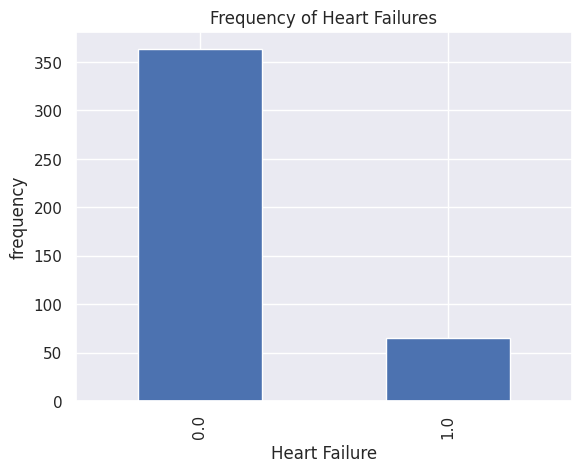

In [ ]:
df['outcome'].value_counts().plot(kind='bar', title='Frequency of Heart Failures', xlabel='Heart Failure', ylabel='frequency')

#觀察共病症與因變數（即結果）之間的相關性。

1.抓出欲想要分析的欄位

In [ ]:
col = ['gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

2.相關性分析圖表
這段程式碼是在進行資料框 df 中某個特定欄位 col 的相關性分析，並使用熱度圖 (heatmap) 來直觀呈現相關性的程度。以下是對這段程式碼的說明：

(1)corr = df[col].corr(): 這一行程式碼計算了資料框 df 中特定欄位 col 與其他數值型欄位的相關係數。corr 變數將包含一個相關性矩陣，顯示了各欄位之間的相關性程度。

(2)plt.figure(figsize=(12, 8)): 這一行設定了繪圖區域的大小為 12x8 個單位（寬 x 高），以確保熱度圖顯示清晰。

(3)sns.heatmap(corr, annot=True, cmap='PuBu', linewidths=0.01, linecolor="white"): 這一行程式碼使用 seaborn (sns) 中的 heatmap 函數繪製熱度圖。具體參數解釋如下：

- corr: 相關性矩陣，即上一步計算的相關性資訊。

- annot=True: 在每個熱度圖的方格中標註相關係數的數值。

- cmap='PuBu': 指定繪製熱度圖時使用的色彩地圖，這裡是使用 'PuBu'（藍色到紫色的漸層）。

- linewidths=0.01: 方格之間的白線寬度。

- linecolor="white": 方格之間的白線顏色。

這段程式碼的目的是以熱度圖的形式呈現特定欄位 col 與其他數值型欄位之間的相關性程度，方便用戶直觀地了解數據中各欄位之間的相關性。

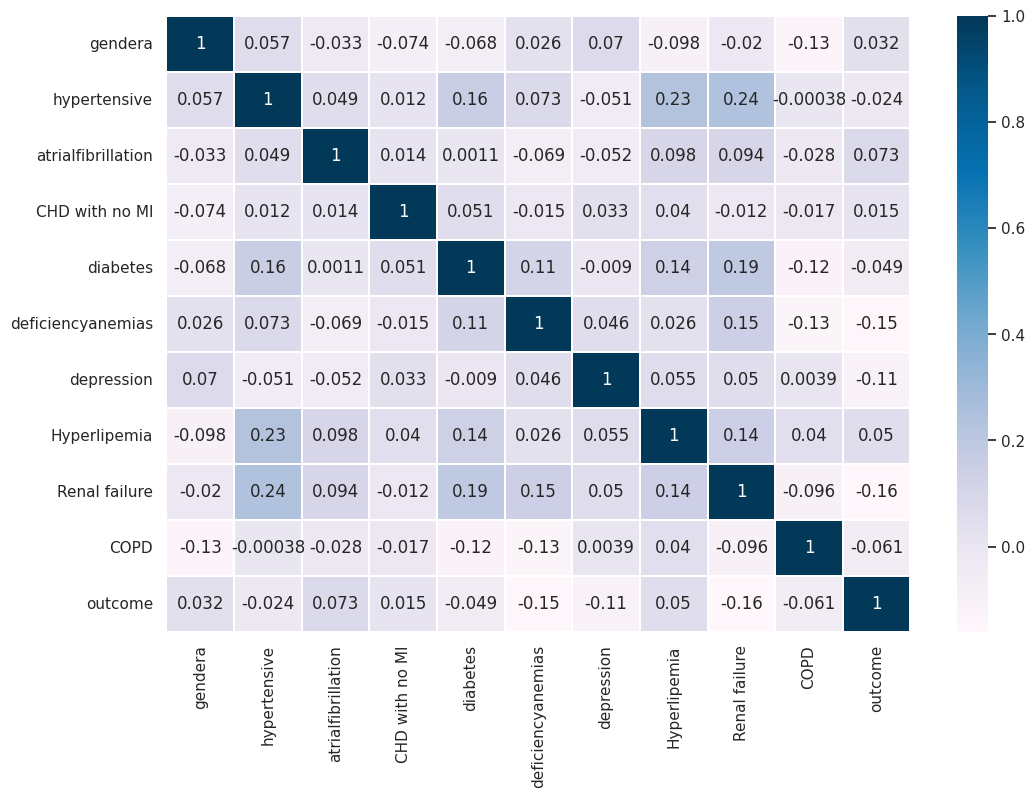

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[col].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='PuBu',linewidths=0.01,linecolor="white");

長條圖
- 想要了解哪個年齡群在醫院中最多？

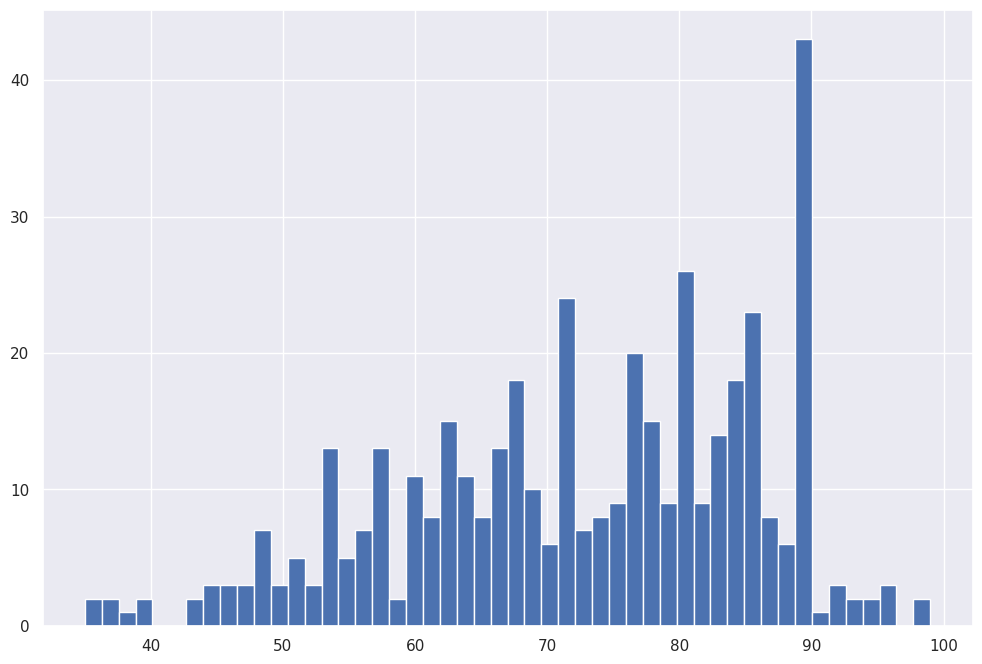

In [ ]:
import matplotlib.pyplot as plt
df.age.hist(bins = 50, figsize=(12,8))
plt.show()

#我們可以看到，89歲的年齡群在醫院中佔最多數量。

圓餅圖

- 使用了Python中的Matplotlib函式庫，主要用於創建一個圓環狀的餅圖（Pie Chart），用於可視化資料框（DataFrame）中"outcome"欄位的分佈情況

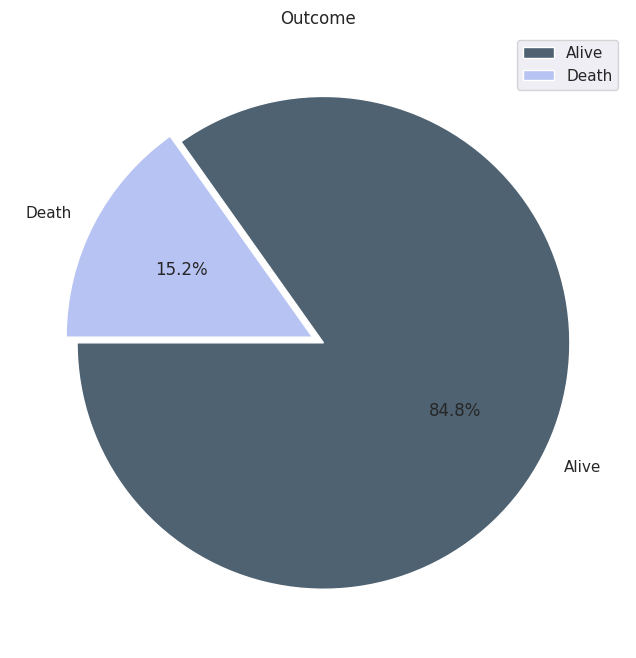

In [ ]:
# 載入 Matplotlib 函式庫
import matplotlib.pyplot as plt

# 設定圖表的大小
plt.figure(figsize=(12, 8))

# 設定圖表的標題
plt.title("Outcome")

# 在圖表中心添加一個白色的圓環，使餅圖看起來像是在一個圓環中
circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_artist(circle)

# 使用 plt.pie() 函式繪製餅圖
# df.outcome.value_counts() 用於計算"outcome"欄位中各類別的數量
# explode=(0.025, 0.025) 表示將餅圖中的兩個部分稍微分離，以突顯它們
# labels=['Alive', 'Death'] 是餅圖中每個部分的標籤
# colors=['#4F6272', '#B7C3F3'] 設定餅圖中各部分的顏色
# autopct='%1.1f%%' 表示在圖上顯示每個部分的百分比，保留一位小數
# startangle=180 表示開始畫餅圖的角度為180度（從圓環下方開始）
g = plt.pie(df.outcome.value_counts(), explode=(0.025, 0.025), labels=['Alive', 'Death'], colors=['#4F6272', '#B7C3F3'], autopct='%1.1f%%', startangle=180)

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()

#超過15%的患者在醫院中去世，其餘的患者仍然存活。

水平條形計數圖（Countplot）

- 使用了Matplotlib和Seaborn函式庫，主要用於創建一個水平條形計數圖（Countplot），可視化資料框（DataFrame）中的"age"和"outcome"欄位之間的關係。

- 同時展示了資料框中**"age"欄位和"outcome"欄位之間的關係。條形的高度表示每個年齡組中不同結果的樣本數量，並且使用不同的顏色區分了"outcome"的不同類別。

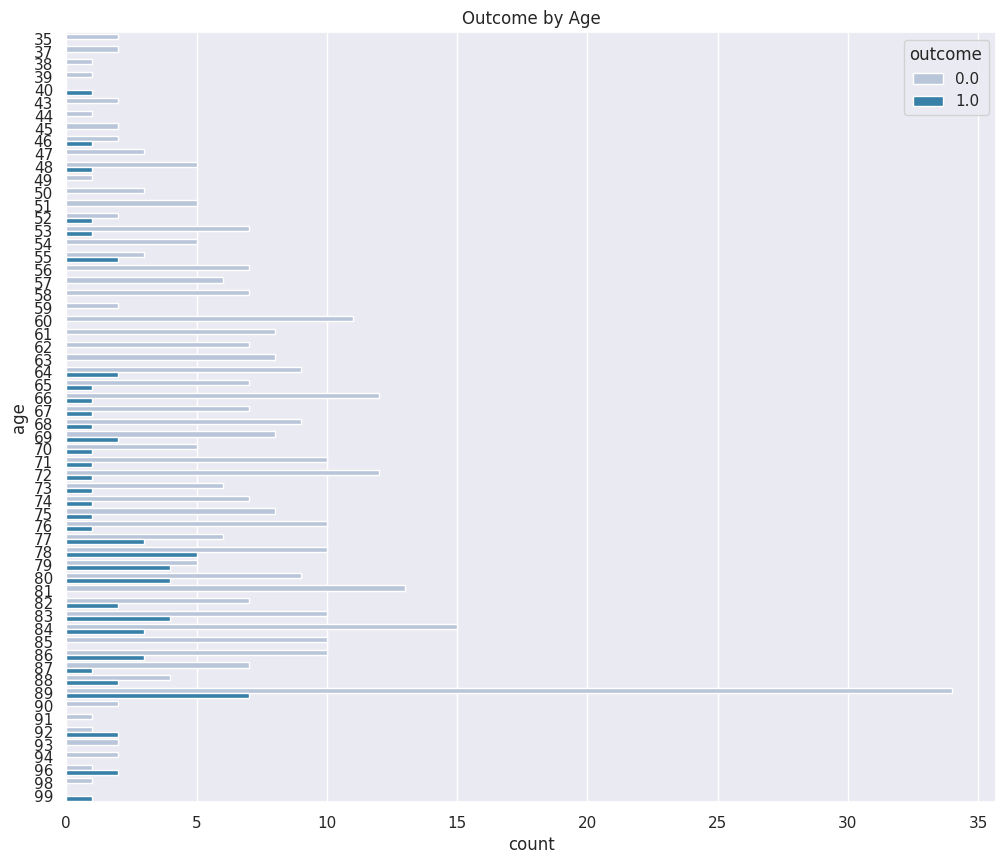

In [ ]:
# 載入 Matplotlib 和 Seaborn 函式庫
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖表的大小
plt.figure(figsize=(12, 10))

# 設定 Seaborn 的主題和顏色風格
sns.set_theme(style="darkgrid", color_codes=True)

# 使用 sns.countplot() 函式繪製水平條形計數圖
# y="age" 表示條形圖的y軸是"age"欄位
# hue="outcome" 表示根據"outcome"欄位對條形進行著色，即不同的結果顯示不同的顏色
# data=df 表示使用的資料框
# palette="PuBu" 設定顏色調色板
ax = sns.countplot(y="age", hue="outcome", data=df, palette="PuBu")

# 設定圖表的標題
plt.title("Outcome by Age")

# 顯示圖表
plt.show()

- 創建了一個圓環狀的餅圖，用於可視化資料框（DataFrame）中的"gendera"欄位的兩個性別類別（'Male'和'Female'）的分佈情況。

- 圓環效果添加一個白色的圓環來視覺化的，助於提高視覺效果。

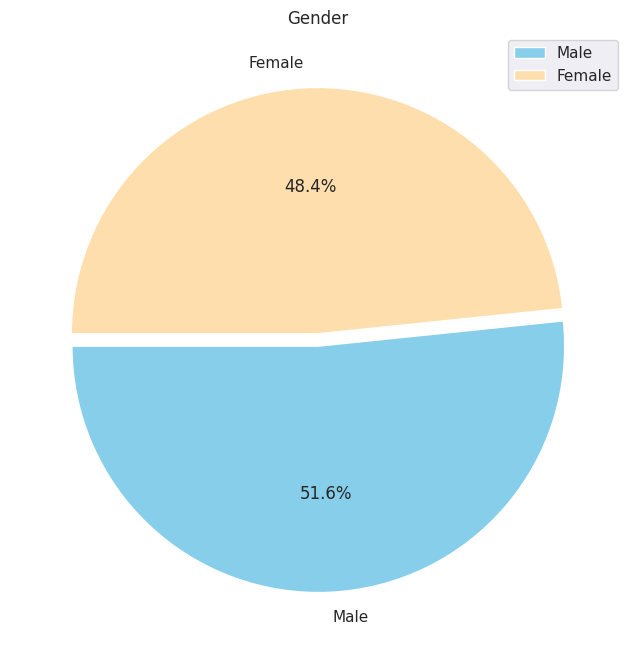

In [ ]:
# 載入 Matplotlib 函式庫
import matplotlib.pyplot as plt

# 設定圖表的大小
plt.figure(figsize=(12, 8))

# 設定圖表的標題
plt.title("Gender")

# 在圖表中心添加一個白色的圓環，使餅圖看起來像是在一個圓環中
circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_artist(circle)

# 使用 plt.pie() 函式繪製餅圖
# df.gendera.value_counts() 用於計算"gendera"欄位中各類別的數量
# explode=(0.025, 0.025) 表示將餅圖中的兩個部分稍微分離，以突顯它們
# labels=['Male', 'Female'] 是餅圖中每個部分的標籤
# colors=['skyblue', 'navajowhite'] 設定餅圖中各部分的顏色
# autopct='%1.1f%%' 表示在圖上顯示每個部分的百分比，保留一位小數
# startangle=180 表示開始畫餅圖的角度為180度（從圓環下方開始）
g = plt.pie(df.gendera.value_counts(), explode=(0.025, 0.025), labels=['Male', 'Female'], colors=['skyblue', 'navajowhite'], autopct='%1.1f%%', startangle=180)

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()

- 使用了Seaborn和Matplotlib函式庫，用於創建一個水平條形計數圖（Countplot），以可視化資料框（DataFrame）中的"gendera"和"outcome"欄位之間的關係。

- 條形的高度表示每個性別組中不同結果的樣本數量，並使用不同的顏色區分了"outcome"的不同類別。

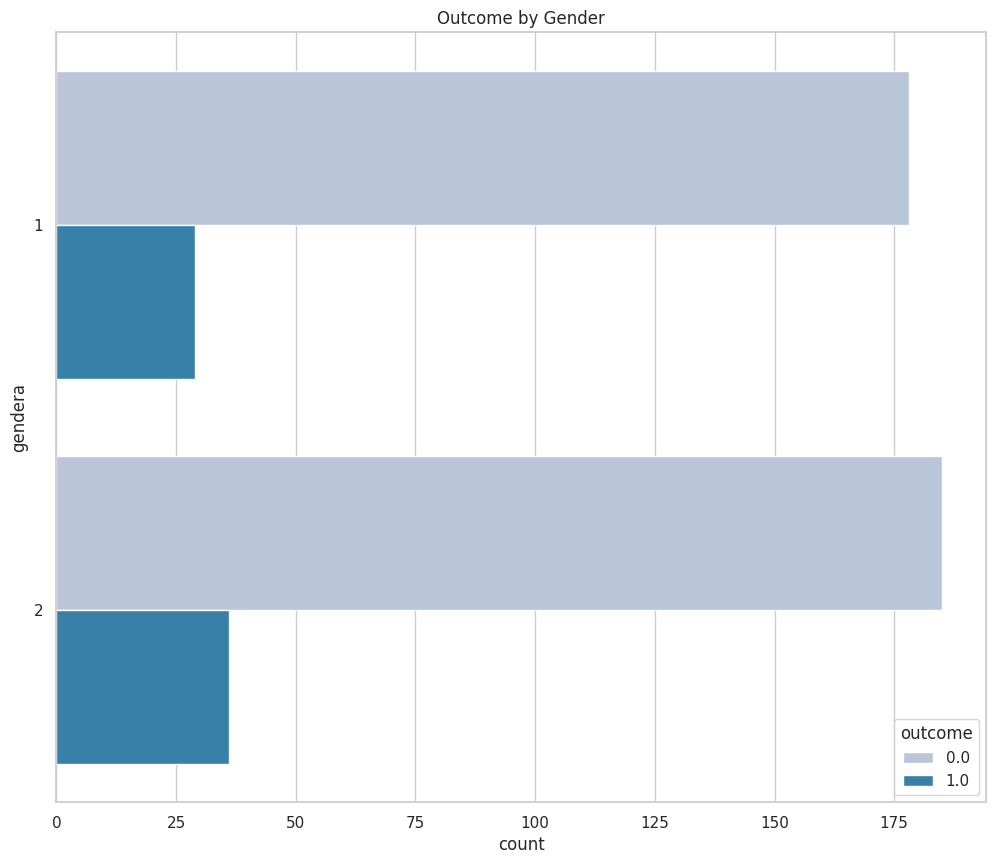

In [ ]:
# 載入 Seaborn 和 Matplotlib 函式庫
import seaborn as sns
import matplotlib.pyplot as plt

# 設定圖表的大小
plt.figure(figsize=(12, 10))

# 設定 Seaborn 的主題和顏色風格
sns.set_theme(style="whitegrid", color_codes=True)

# 使用 sns.countplot() 函式繪製水平條形計數圖
# y="gendera" 表示條形圖的y軸是"gendera"欄位
# hue="outcome" 表示根據"outcome"欄位對條形進行著色，即不同的結果顯示不同的顏色
# data=df 表示使用的資料框
# palette="PuBu" 設定顏色調色板
ax = sns.countplot(y="gendera", hue="outcome", data=df, palette="PuBu")

# 設定圖表的標題
plt.title("Outcome by Gender")

# 顯示圖表
plt.show()

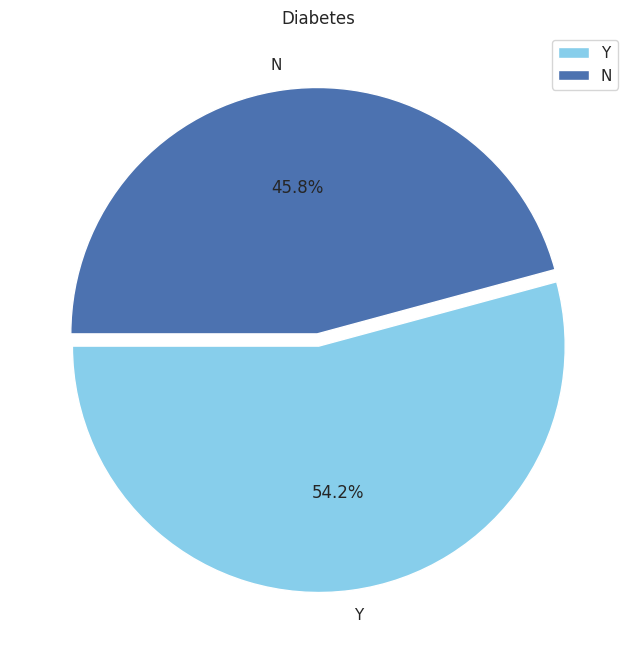

In [ ]:
# 載入 Matplotlib 函式庫
import matplotlib.pyplot as plt

# 設定圖表的大小
plt.figure(figsize=(12, 8))

# 設定圖表的標題
plt.title("Diabetes")

# 在圖表中心添加一個白色的圓環，使餅圖看起來像是在一個圓環中
circle = plt.Circle((0, 0), 0.5, color='white')
plt.gca().add_artist(circle)

g = plt.pie(df.diabetes.value_counts(), explode=(0.025, 0.025), labels=['Y', 'N'], colors=['skyblue', 'b'], autopct='%1.1f%%', startangle=180)
# 使用 plt.pie() 函式繪製餅圖
# df.diabetes.value_counts() 用於計算"diabetes"欄位中各類別的數量
# explode=(0.025, 0.025) 表示將餅圖中的兩個部分稍微分離，以突顯它們
# labels=['Y', 'N'] 是餅圖中每個部分的標籤
# colors=['skyblue', 'b'] 設定餅圖中各部分的顏色
# autopct='%1.1f%%' 表示在圖上顯示每個部分的百分比，保留一位小數
# startangle=180 表示開始畫餅圖的角度為180度（從圓環下方開始）

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()

在進行機器學習的前置處理-方法一：有補值(KNN補值)及標準化：

1.創建特徵（Create Features）：

- features = df.iloc[:, 2:] 表示想要從 DataFrame 中選擇所有行（:）和從第三列（索引編號為2）開始的所有列作為特徵。這裡的 iloc 是一個用於按位置索引選擇的方法。

2.處理缺失值（Handling Missing Values）：

- 使用 KNNImputer 進行缺失值的處理。這個模型使用 k-最近鄰演算法，根據特徵的其他值來估算缺失值。在這裡，n_neighbors=2 表示使用2個最近的鄰居進行估算，weights="uniform" 表示使用均勻的權重。

3.特徵標準化（Feature Standardization）：

- 使用 StandardScaler 進行特徵標準化。標準化是一種常見的前置處理步驟，它將特徵的數值縮放到均值為0，標準差為1的範圍內，以確保不同特徵的尺度一致，這有助於一些機器學習算法的性能。

4.X的建立：

- 最後，將經過缺失值處理和標準化的特徵資料存儲在 X 變數中，可以用於訓練機器學習模型。

這段程式碼的目的是準備好訓練機器學習模型所需的特徵資料，包括處理缺失值和標準化。

In [ ]:
# create features (data to train)
features = df.iloc[:, 2:]
# Eliminate Nan values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_impute = imputer.fit_transform(features)
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X_impute)
X = X_scale

在進行機器學習的前置處理-方法二：刪除缺失值行

取出y(預測欄位)：從 DataFrame 中刪除具有缺失目標值（'outcome'列）的行。以下是對這段程式碼的解釋：

1.刪除缺失值行：

- df = df.dropna(subset=['outcome']) 表示從 DataFrame 中刪除具有缺失 'outcome' 值的行。這樣做的效果是，DataFrame 中不包含 'outcome' 列中有缺失值的行。這是針對那些目標值缺失的數據進行處理的一種方式。
重設索引：

- df = df.reset_index(drop=True) 用於重設 DataFrame 的索引，drop=True 表示丟棄原始索引列。這樣做是為了使索引重新排序，以便在後續使用中更容易操作。如果不執行這個步驟，你的 DataFrame 索引可能會保留原始狀態。
總的來說，這段程式碼用於處理目標值缺失的數據，刪除具有缺失 'outcome' 值的行，然後重設索引，以確保 DataFrame 在處理後保持結構的一致性。

In [ ]:
# One outcome value to nan: to delete
# drop rows
# from dataFrame where outcome is nan
df = df.dropna(subset=['outcome'])
df = df.reset_index(drop=True)

# 機器學習步驟四：建立模型

DECISION TREE(決策樹)


使用機器學習的前置處理-方法一：有補值(KNN補值)及標準化的資料來進行模型訓練

In [ ]:
# create features (data to train)

features = df.iloc[:, 2:]

# Eliminate Nan values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_impute = imputer.fit_transform(features)

from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X_impute)
X = X_scale

抓取預測目標

- 從資料框中提取"outcome"欄位的值，並將其轉換為一維數組，以便在機器學習模型中使用作為預測目標。

- 創建機器學習中的標籤（ground truth），通常用於監督式學習任務。在這個案例中，標籤來自資料框（DataFrame）中的"outcome"欄位。

對程式碼的解釋：

- labels = df['outcome']: 這一行程式碼從資料框（DataFrame）中選取名為"outcome"的欄位，並將其存儲在變數labels中。這是我們的目標變數或標籤，其中包含了每個樣本的預期結果或類別。

- y = np.ravel(labels): 這一行程式碼使用NumPy中的ravel函式，將labels轉換為一維數組。這是為了確保標籤的形狀（shape）符合機器學習模型的要求，因為模型通常期望標籤是一維數組而不是二維。

In [ ]:
import numpy as np
# create the labels (ground truth)
labels = df['outcome']
y = np.ravel(labels)

生成四個變數：X_train（訓練集特徵）、X_test（測試集特徵）、y_train（訓練集標籤）、y_test（測試集標籤），它們將用於訓練機器學習模型和評估模型的性能。

使用scikit-learn函式庫中的train_test_split函式，來將資料集分成訓練集和測試集。
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42): 這一行程式碼使用train_test_split函式，將特徵數據X和標籤y分割為訓練集（X_train和y_train）和測試集（X_test和y_test）。

代碼說明：
- X: 包含特徵的數據集。
- y: 包含標籤的數據集。
- test_size=0.33: 表示將33%的數據分配給測試集，剩餘的67%分配給訓練集。
- random_state=42: 是一個隨機種子，它確保每次運行程式碼時，切分的方式都相同。這有助於確保結果的可重現性。

In [ ]:
# creating train and test data
from sklearn.model_selection import train_test_split   #導入了train_test_split函式，該函式用於將資料集拆分為訓練集和測試集。train_test_split位於sklearn.model_selection模塊中。

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)

解決資料集中類別不平衡（unbalanced data）的問題

- 即某些類別的樣本數量遠多於其他類別。在這裡，它使用了每個類別的權重，以便在訓練機器學習模型時更好地處理不平衡的資料。

解釋：

- num_patients = df.shape[0]: 這一行程式碼計算資料框中樣本的總數，即病患的總數。

- dicto = labels.value_counts().to_dict(): 這一行程式碼使用value_counts()函式計算"outcome"欄位中各類別的樣本數，然後將其轉換為字典格式。

- counter = Counter(dicto): 這一行程式碼使用Counter類別，計算每個類別的樣本數量，這是Python標準庫中的計數器。

- max_val = float(max(counter.values())): 這一行程式碼找到樣本數量最多的類別。

- class_weight = {class_id : max_val/num_patients for class_id, num_patients in counter.items()}: 這一行程式碼創建了一個字典class_weight，其中包含每個類別的權重。每個類別的權重被設定為max_val/num_patients，其中max_val是樣本數量最多的類別的樣本數，num_patients是每個類別的樣本數。

助於模型更加重視樣本數量較少的類別，以避免模型偏向於樣本數量較多的類別而對較少的類別忽視的問題。

In [ ]:
# weight the two classes because of unbalanced data
from collections import Counter

num_patients = df.shape[0]
dicto = labels.value_counts().to_dict()
counter = Counter(dicto)
max_val = float(max(counter.values()))
class_weight = {class_id : max_val/num_patients for class_id, num_patients in counter.items()}
print(class_weight)

{0.0: 1.0, 1.0: 5.584615384615384}


使用scikit-learn函式庫中的DecisionTreeClassifier，用於建立一個決策樹分類器。此外，將之前計算的類別權重（class_weight）作為參數傳遞給DecisionTreeClassifier，模型將考慮類別不平衡的情況。

解釋：
- model = DecisionTreeClassifier(class_weight=class_weight): 這一行程式碼實例化了DecisionTreeClassifier。class_weight參數被設置為之前計算的類別權重，這表示在模型的訓練過程中，樣本數量較少的類別將受到更大的關注。

有助於提高對不平衡數據集的建模效果，使得模型更能有效地處理樣本數量不均勻的類別。

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#instanciation of the decision tree
model = DecisionTreeClassifier(class_weight = class_weight)

建立模型

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0.0: 1.0, 1.0: 5.584615384615384})

獲取模型對測試集的預測結果，特別是對於死亡（"Death"）這個類別的預測結果

解釋：

- model.predict(X_test): 這一部分程式碼使用訓練好的模型對測試集中的特徵（X_test）進行預測。模型對每個樣本的預測概率或分數。

- (model.predict(X_test) > 0.5): 這一部分程式碼將模型的預測概率與0.5進行比較，以確定模型是否預測該樣本屬於"Death"類別。如果預測概率大於0.5，則為True，否則為False。

- astype("int32"): 這一部分程式碼將上一步的True/False轉換為0和1的整數形式，即將預測結果二值化為0和1。0表示模型預測該樣本不屬於"Death"類別，1表示模型預測該樣本屬於"Death"類別。

In [ ]:
# get the models predicted outcome (death)
y_predictions = (model.predict(X_test) > 0.5).astype("int32")

# 機器學習步驟五：評估模型

計算模型在測試集上的預測準確度

說明：
- model.score(X_test, y_test): 這一行程式碼使用模型對測試集的預測結果（X_test）和實際標籤（y_test）來計算模型的預測準確度。score是模型在測試集上的預測準確度。

In [ ]:
score = model.score(X_test, y_test)
score

1.0

計算模型在測試集上的分類評估報告

- 使用了scikit-learn函式庫中的classification_report函式，用於計算並印出模型在測試集上的分類報告。分類報告提供了模型在每個類別上的精確度、召回率、F1分數和支持數等指標。

分類報告中的指標解釋如下：

- Precision（精確度）：在所有模型預測為正例的樣本中，實際為正例的比例。

- Recall（召回率）：在所有實際正例的樣本中，模型成功預測為正例的比例。

- F1-score（F1分數）：精確度和召回率的加權平均，綜合考慮了兩者。

- Support（支持數）：每個類別在測試集中的實際樣本數。

分類報告可以提供對模型性能的更全面理解，特別是在處理不平衡數據集或多類別分類的情況下。

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       123
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



計算模型在測試集上的分類評估報告

- 用了混淆矩陣（Confusion Matrix）來評估模型的性能，並使用Seaborn函式庫繪製了一個熱力圖，以視覺化混淆矩陣。

- 這段程式碼中，print_conf_mat函式接受混淆矩陣和類別標籤，並使用Seaborn的heatmap函式來生成一個熱力圖。
- 熱力圖的行和列分別表示實際值和預測值，每個格子中的數字表示對應類別的樣本數。這樣的熱力圖可以直觀地展示模型在每個類別上的表現。


混淆矩陣是用於評估機器學習模型性能的表格


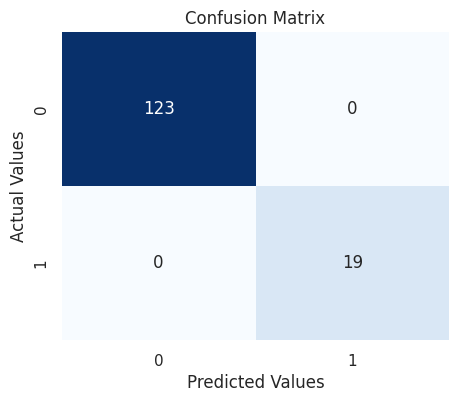

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 獲取模型的預測結果
y_predictions = (model.predict(X_test) > 0.5).astype("int32")

# 計算混淆矩陣
conf_mat = confusion_matrix(y_test, y_predictions)

# 繪製混淆矩陣的熱力圖
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

ROC CURVE

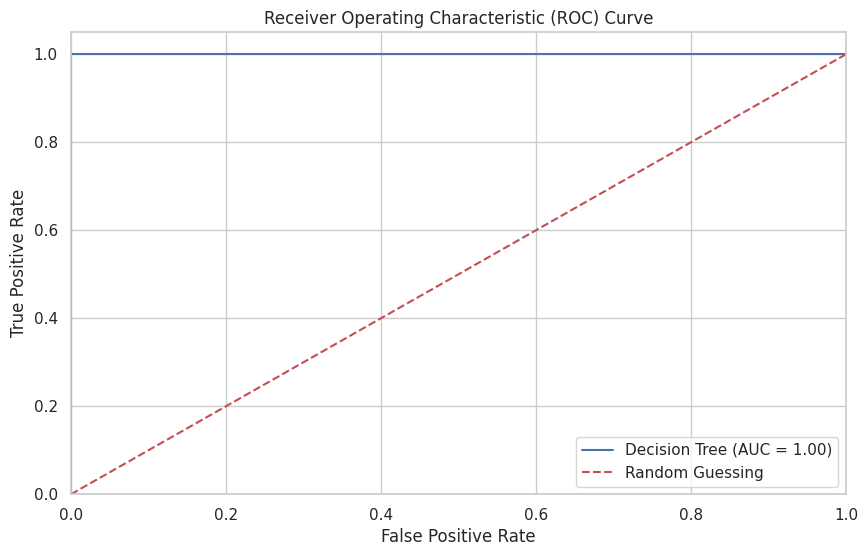

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# 獲取決策樹模型的預測概率
y_pred_proba_decision_tree = model.predict_proba(X_test)[:, 1]

# 計算 ROC 曲線的指標
roc_auc = roc_auc_score(y_test, y_pred_proba_decision_tree)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_decision_tree)

# 繪製 ROC 曲線
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')

# 設定圖表標籤
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 顯示 ROC 曲線
plt.show()

#影像前處理

https://reurl.cc/lNa0xl


STEP 1 :

In [ ]:
!pip install opencv-python

In [ ]:
#檢查圖片檔案是否存在：
!ls drive/MyDrive/20240203_Python進階課程/XrayNormal.jpeg

drive/MyDrive/20240203_Python進階課程/XrayNormal.jpeg


先設置讀取影像路徑

In [ ]:
image_path = "/content/drive/MyDrive/20250104_Python課程/XrayNormal.jpeg"

STEP 2 :
1. OPEN IMAGE

- 使用 imread() 方法，可以開啟圖片，imread()

- 有兩個參數，第一個參數為檔案的路徑和名稱，第二個參數可不填，

- 表示以何種模式 ( mode ) 開啟圖片，開啟的圖片支援常見的 jpg、png...等格式，下面是最基本開啟圖片的程式碼。
2. SHOW IMAGE

- cv2.cvtColor
- 被用來將圖片從BGR轉換為RGB格式，因為Matplotlib期望圖片是以RGB格式表示。其餘的程式碼是為了使用Matplotlib顯示圖片。

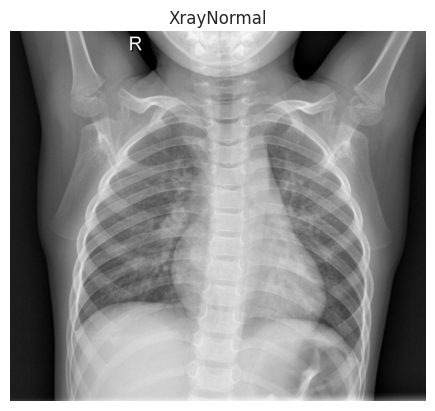

In [ ]:
import matplotlib.pyplot as plt #匯入必要的模組：
import cv2 #匯入必要的模組：

img = cv2.imread(image_path)  ## .jpg, .png, .tif, etc.

# OpenCV reads images in BGR format, and Matplotlib expects images in RGB format.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #將圖片轉換成 RGB 格式：

#顯示圖片：
plt.imshow(img_rgb)
plt.title("XrayNormal")
plt.axis('off')  # Optional: Turn off axis labels # 選擇性：關閉座標軸標籤
plt.show()

STEP3：影像前處理方式
1. reize() 改變尺寸
使用 reize() 方法，可以將影像輸出為指定的尺寸，下方的程式碼，會產生兩張不同尺寸的圖片,
設定 interpolation 參數，指定改變尺寸的插值方式

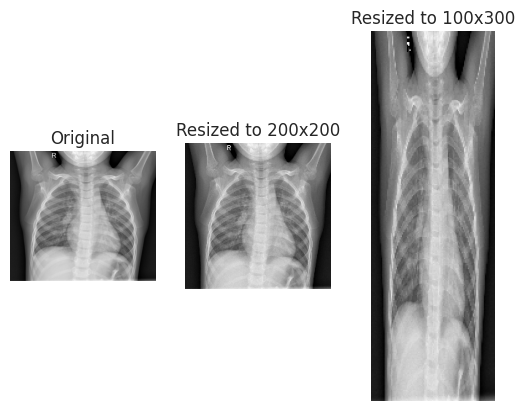

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(image_path)  ## .jpg, .png, .tif, 等等

# OpenCV 讀取圖片是以BGR格式，而Matplotlib期望圖片是以RGB格式，因此需要進行轉換
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')  # 選擇性：關閉坐標軸標籤

output_1 = cv2.resize(img, (200, 200))   # 產生 200x200 的圖
cv2.imwrite('200x200_cat_1.jpg', cv2.cvtColor(output_1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.imshow(output_1)
plt.title("Resized to 200x200")
plt.axis('off')  # 選擇性：關閉坐標軸標籤

output_2 = cv2.resize(img, (100, 300))   # 產生 100x300 的圖
cv2.imwrite('100x300_cat_2.jpg', cv2.cvtColor(output_2, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.imshow(output_2)
plt.title("Resized to 100x300")
plt.axis('off')  # 選擇性：關閉坐標軸標籤

plt.show()

2.cvtcolor() 色彩轉換

OpenCV 的 cvtcolor() 方法，可以將轉換影像色彩

- 使用方法：cv2.cvtColor(img, code) # img 來源影像 # code 要轉換的色彩空間名稱

- 常用代碼：

  (1)cv2.COLOR_BGR2BGRA RGB 轉 RGBA。

  (2)cv2.COLOR_BGRA2BGR RGBA 轉 RGB。

  (3)cv2.COLOR_BGR2GRAY RGB 轉灰階。

  (4)cv2.COLOR_BGR2HSV RGB 轉 HSV。

  (5)cv2.COLOR_RGB2HLS RGB 轉 RSL

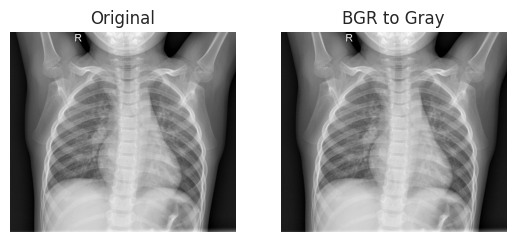

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 轉換成灰階影像

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')  # 使用灰階顏色映射
plt.title('BGR to Gray')
plt.axis('off')

plt.show()

- 剪裁影像--使用陣列切片裁剪圖片

 OpenCV 裡讀取的影像，實質上是 NumPy 的陣列，因此在讀取影像後，使用陣列的切片方式，取出想要的範圍，另存成新的圖片，就可以實現剪裁圖片的效果

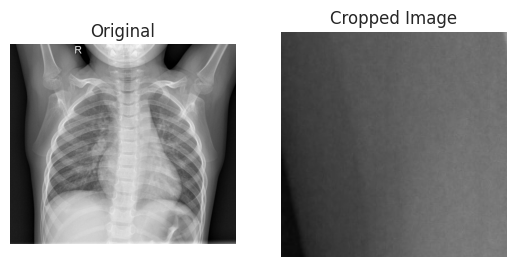

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(image_path)
x = 100
y = 100
w = 200
h = 200
crop_img = img[y:y+h, x:x+w]  # 取出陣列的範圍

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

- 調整影像的對比和亮度--搭配 NumPy 調整對比度和亮度

  在 OpenCV 裡讀取的影像，實質上是 NumPy 的陣列，因此在讀取影像後，
透過 NumPy「陣列廣播」的功能，就能迅速更改圖片中每個像素的顏色
調整 contrast ( 對比 ) 和 brightness ( 亮度 ) 的數值，就能改變影像的對比度和亮度

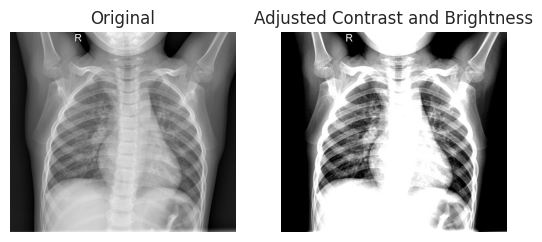

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread(image_path)

contrast = 200
brightness = 0
output = img * (contrast/127 + 1) - contrast + brightness # 轉換公式
output = np.clip(output, 0, 255)
output = np.uint8(output)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Contrast and Brightness')
plt.axis('off')

plt.show()

二值化黑白影像

- 運用 OpenCV 裡的 threshold() 方法，將影像上轉換為二值化的黑白影像，

- 進一步使用 adaptiveThreshold() 自適應二值化的方法，產生效果更好的黑白影像。

什麼是二值化 ( 閾值二進制 )？

- 一種簡單的圖像分割方法，二值化會根據「閾值」( 類似臨界值 ) 進行轉換，例如某個像的灰度值大於閾值，則轉換為黑色，如果這個像素的灰度小於閾值則轉換為白色，進而實現二值化的轉換效果，經過二值化轉換的圖片，通常只會剩下黑和白兩個值。

- 許多影像辨識或影像處理的領域 ( 例如輪廓偵測、邊緣偵測...等 )，都會使用二值化影像進行運算，有些影像處理甚至會先將圖片二值化後，再進行後續的計算處理。

二值化黑白影像方法一：threshold() 產生黑白影像

- threshold() 方法可以將灰階的影像，以二值化的方式轉換成黑白影像

- 使用方法：ret, output = cv2.THRESH_BINARY(img, thresh, maxval, type)

- 參數

  (1)ret 是否成功轉換，成功 True，失敗 False

  (2)img 來源影像

  (3)thresh 閾值，通常設定 127

  (4)maxval 最大灰度，通常設定 255

  (5)type 轉換方式
- threshold() 方法有下列幾種轉換方式，使用 127 和 255 作為說明範例

  (1)cv2.THRESH_BINARY 如果大於 127 就等於 255，反之等於 0。

  (2)cv2.THRESH_BINARY_INV 如果大於 127 就等於 0，反之等於 255。

  (3)cv2.THRESH_TRUNC 如果大於 127 就等於 127，反之數值不變。

  (4)cv2.THRESH_TOZERO 如果大於 127 數值不變，反之數值等於 0。

  (5)cv2.THRESH_TOZERO_INV 如果大於 127 等於 0，反之數值不變。

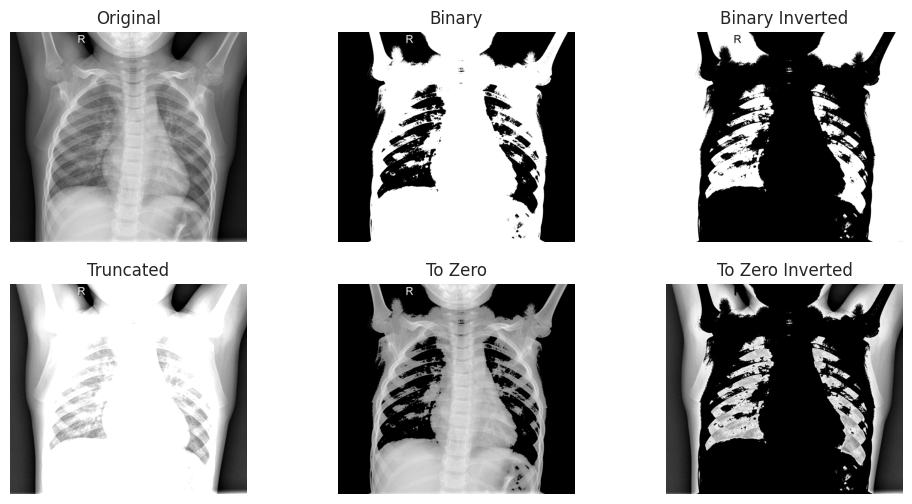

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 產生不同 thresholding 結果
ret, output1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) # 如果大於 127 就等於 255，反之等於 0。
ret, output2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) # 如果大於 127 就等於 0，反之等於 255。
ret, output3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC) # 如果大於 127 就等於 127，反之數值不變。
ret, output4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO) # 如果大於 127 數值不變，反之數值等於 0。
ret, output5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV) # 如果大於 127 等於 0，反之數值不變。

# 顯示結果使用 Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(output1, cmap='gray')
plt.title('Binary')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(output2, cmap='gray')
plt.title('Binary Inverted')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(output3, cmap='gray')
plt.title('Truncated')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(output4, cmap='gray')
plt.title('To Zero')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(output5, cmap='gray')
plt.title('To Zero Inverted')
plt.axis('off')

plt.show()

影像邊緣偵測--(3) Canny()

針對「灰階圖片」，使用 Canny 運算子進行偵測邊緣的轉換

使用方法：cv2.Canny(img, threshold1, threshold2, apertureSize)

參數：

◆ img 來源影像

◆ threshold1 門檻值，範圍 0～255

◆ threshold2 門檻值，範圍 0～255

◆ apertureSize 計算梯度的 kernel size，預設 3

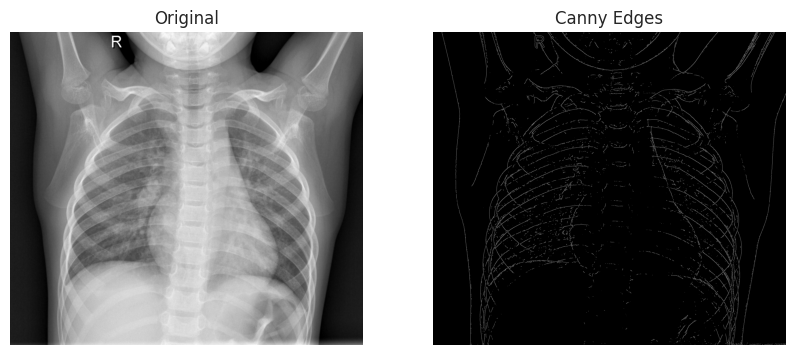

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)
edges = cv2.Canny(img_blur, 36, 36)

# 顯示結果使用 Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

#深度學習


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
!pip install rarfile

In [72]:
#!pip install rarfile
import rarfile

fn = "/content/drive/MyDrive/20250104_Python課程/xray_dataset.rar"
path = "/content/drive/MyDrive/20250104_Python課程"
# 解壓縮檔案
with rarfile.RarFile(fn) as rf:
    rf.extractall(path=path)

使用 Keras 的 ImageDataGenerator 來進行圖像數據增強和生成圖像數據流的過程。該程式碼主要用於訓練神經網絡，特別是在處理圖像分類任務時。

程式碼的詳細解釋：

- ImageDataGenerator 的設定:

  (1)rescale=1./255: 將像素值縮放到 [0, 1] 的範圍，這是一種標準的圖像預處理操作。

  (2)shear_range=0.2: 隨機剪切強度，這將導致圖像以一定角度進行剪切變換。

  (3)zoom_range=0.2: 隨機縮放強度，這將導致圖像以一定比例進行縮放變換。

  (4)horizontal_flip=True: 隨機水平翻轉圖像。

- 訓練和測試數據生成器:

  (1) train_datagen 和 test_datagen 是分別用於訓練集和測試集的 ImageDataGenerator 實例。

  (2) flow_from_directory 方法從目錄中生成數據流，這裡分別用於訓練集 (training_set) 和測試集 (test_set)。

  (3)target_size=(224, 224): 指定輸入圖像的目標大小。

  (4)batch_size=32: 指定每個批次的樣本數。

  (5)class_mode="sparse": 這是一個二元分類問題，所以使用 "sparse" 表示標籤是整數類別。
  
  (6)color_mode="grayscale": 圖像是灰度的，而非彩色。

- 使用生成的 training_set 和 test_set 來訓練和評估深度學習模型。

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/20250104_Python課程/xray_dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    color_mode="grayscale"
)
test_set = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/20250104_Python課程/xray_dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    color_mode="grayscale"
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


顯示從 training_set 中抽取的一個批次圖像。

解釋：

- training_set.__next__()：這個方法用來從 training_set 中抽取一個批次的數據。該方法返回一個包含圖像和對應標籤的元組。

- batch[0]：這個取值操作獲取了批次中的圖像。batch 是一個四維的 NumPy 陣列，其形狀為 (batch_size, height, width, channels)。

- print(batch.shape)：這行程式碼打印出了批次的形狀，以確保它的維度和大小是符合預期的。

- plt.figure(figsize=(5, 5))：這個函式創建了一個新的 Matplotlib 圖形，設定圖形大小為 5x5 英寸。

- 迴圈 for i in range(9)：這個迴圈用來顯示 9 張圖像。

- plt.subplot(3, 3, i+1)：這個函式用來創建一個 3x3 的子圖表，並將當前的子圖定位為 i+1。

- plt.imshow(batch[i], cmap="gray")：這行程式碼顯示了批次中第 i 張圖像。cmap="gray" 指定了使用灰度色彩映射。

- plt.axis("off")：這個函式用來隱藏坐標軸。

(32, 224, 224, 1)


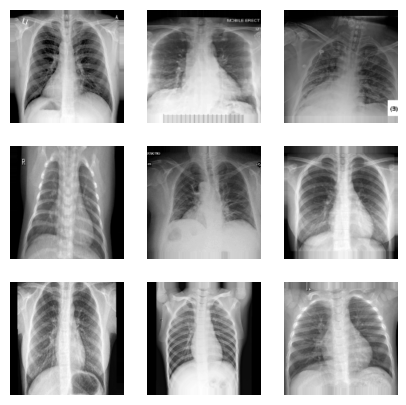

In [ ]:
import matplotlib.pyplot as plt
batch = training_set.__next__()[0]
print(batch.shape)
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch[i], cmap="gray")
    plt.axis("off")

使用 TensorFlow 中的 Keras 模型建立了一個卷積神經網絡（Convolutional Neural Network, CNN）。

解釋：

- from tensorflow.keras.models import Sequential：導入 Keras 中的 Sequential 模型，是一種線性堆疊模型的容器。

- from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Dense：導入 Keras 中的一些常用層，包括卷積層、池化層、展平層、全局平均池化層和全連接層。

- layers：包含了神經網絡層的列表。每個層都按照順序添加到模型中。

- Conv2D(64, 3, padding="same", activation="relu", input_shape=(224, 224, 1))：64個3x3的卷積核，使用ReLU激活函數，填充方式為'same'，輸入形狀為(224, 224, 1)的灰度圖像。

- MaxPooling2D()：最大池化層，用於減小特徵圖的空間尺寸。

- Conv2D(128, 3, padding="same", activation="relu")：128個3x3的卷積核，使用ReLU激活函數，填充方式為'same'。

- MaxPooling2D()：最大池化層。

- Conv2D(256, 3, padding="same", activation="relu")：256個3x3的卷積核，使用ReLU激活函數，填充方式為'same'。

- MaxPooling2D()：最大池化層。

- GlobalAveragePooling2D()：全局平均池化層，將每個特徵圖的平均值降至1x1。

- Dense(2, activation="softmax")：具有2個神經元的全連接層，使用softmax激活函數，用於多類別分類，其中每個神經元對應一個類別。

- model = Sequential(layers)：使用 Sequential 模型，將上述層按照順序堆疊，構建了整個神經網絡模型。

- model.summary()：顯示模型的摘要，包括每一層的參數數量、輸入和輸出形狀等。

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Dense

layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(224, 224, 1)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
model = Sequential(layers)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,178 (1.41 MB)

 Trainable params: 370,178 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

 Keras 模型中設定損失函數、優化器和評估指標。

 解釋：
 - model.compile：這個方法用於編譯模型，指定損失函數、優化器和評估指標。

- loss=SparseCategoricalCrossentropy()：設定損失函數為稀疏分類交叉熵。在多類別分類問題中，這是一個適用的損失函數。

- optimizer=Adam()：設定優化器為 Adam。Adam 優化器通常在深度學習中表現良好，它自動調整學習率並有效地更新模型參數。

- metrics=["accuracy"]：設定評估指標為準確率。在模型訓練過程中，將根據這個指標來評估模型的性能。

模型已經成功建立，可以進行後續的訓練和評估操作

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])


使用 Keras 中的 ModelCheckpoint 和 EarlyStopping 回調函數，這兩個回調函數用於在模型訓練過程中執行特定操作。

解釋：

- from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint：導入了 EarlyStopping 和 ModelCheckpoint 回調函數。

- callbacks：這是一個包含了回調函數的列表，用於在訓練過程中執行特定操作。

- ModelCheckpoint("cnn.keras", save_best_only=True)：這個回調函數會在每個 epoch 結束時保存模型的權重到指定的文件 "cnn.h5" 中，並且只保留在驗證集上性能最好的模型權重（save_best_only=True）。

- EarlyStopping(patience=10, restore_best_weights=True)：這個回調函數會在連續10個 epoch 中驗證集的損失沒有改善時停止訓練，並且恢復最佳的模型權重（restore_best_weights=True）。

- model.fit：這是模型訓練的函數。

- training_set：訓練集的數據。

- epochs=5：訓練的輪數，即將數據集遍歷的次數。

- validation_data=test_set：指定驗證集的數據，用於在每個 epoch 結束時計算模型在驗證集上的性能。

- callbacks=callbacks：指定回調函數列表，用於在訓練過程中執行特定操作。

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.keras", save_best_only=True),  # 將 filepath 改為以 .keras 結尾
    EarlyStopping(patience=10, restore_best_weights=True)
]
# 不想要進度條, verbose=2
model.fit(training_set,
     epochs=5,
     validation_data=test_set,
     callbacks=callbacks,)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5215 - loss: 0.7018 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.4305 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.5244 - loss: 0.6920 - val_accuracy: 0.7500 - val_loss: 0.6886
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.5605 - loss: 0.6909 - val_accuracy: 0.8250 - val_loss: 0.6814
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.5919 - loss: 0.6899 - val_accuracy: 0.9500 - val_loss: 0.6712


目的是使用已經訓練好的模型對測試集進行預測，並顯示前8張圖片，包括它們的實際和預測標籤。

程式碼的解釋：

預測：

- 使用 model.predict(test_set) 對測試集進行預測，得到模型對每個圖片的預測概率。
取得測試圖片和標籤：

- 使用 next(test_set) 取得一個批次的測試圖片和標籤。

顯示前8張圖片：

- 使用 plt.figure(figsize=(15, 10)) 創建一個大圖片，設定大小為15x10。
- 使用 for i in range(8): 遍歷前8個元素，即前8張圖片。
- 在每個迭代中，使用 plt.subplot(3, 3, i + 1) 在3x3的網格中創建一個子圖，設定位置。
- 使用 plt.imshow(images[i].reshape(224, 224), cmap='gray') 顯示灰度圖片，假設是224x224的灰度圖。
- 使用 plt.title(f'Actual: {class_names[int(labels[i])]}, Predicted: {class_names[np.argmax(predictions[i])]}') 設定子圖的標題，包括實際標籤和預測標籤。
- 使用 plt.axis("off") 關閉坐標軸，使圖片更清晰。
顯示整體圖片：

- 使用 plt.show() 顯示整體圖片。

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step


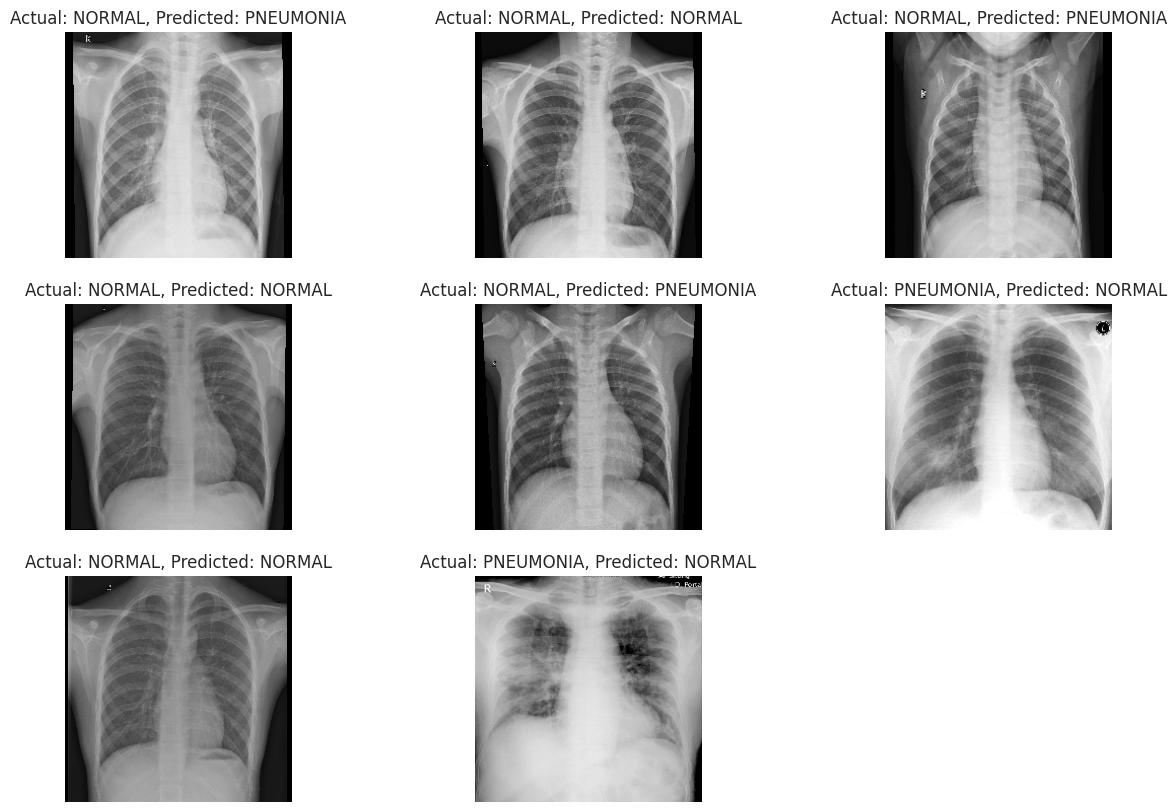

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class_names = ['NORMAL','PNEUMONIA']
# 已經定義了 'model' 和 'class_names'
# 對測試集進行預測
predictions = model.predict(test_set)
# 獲取一批測試圖片和標籤
images, labels = next(test_set)

# 顯示前8張圖片，包括實際和預測標籤
plt.figure(figsize=(15, 10))
for i in range(8):  # 只顯示前8張
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(224, 224), cmap='gray')  # 假設是灰度圖片
    plt.title(f'Actual: {class_names[int(labels[i])]}, Predicted: {class_names[np.argmax(predictions[i])]}')
    plt.axis("off")

plt.show()

使用 glob 库來獲取指定目錄中的圖片文件，然後使用 PIL（Python Imaging Library）來打開和處理圖片


解釋：

- normal = glob.glob("xray_dataset_covid19/test/NORMAL/*")[0]：使用 glob 函數查找 "xray_dataset_covid19/test/NORMAL/" 目錄下的所有文件，返回的是文件的列表。 [0] 表示取第一個文件，即列表的第一個元素。

- pneumonia = glob.glob("xray_dataset_covid19/test/PNEUMONIA/*")[0]：同樣的方式，查找 "xray_dataset_covid19/test/PNEUMONIA/" 目錄下的所有文件，並取第一個文件。

- normal = Image.open(normal).convert("L").resize((224, 224))：使用 Image.open() 函數打開指定文件，然後使用 convert("L") 將圖像轉換為灰度圖像，最後使用 resize((224, 224)) 將圖像大小調整為 (224, 224)。

- pneumonia = Image.open(pneumonia).convert("L").resize((224, 224))：同樣的方式，對第二張圖片進行相同的處理。

In [ ]:
import glob
from PIL import Image
normal = glob.glob("/content/drive/MyDrive/20250104_Python課程/xray_dataset/test/NORMAL/*")[0]
pneumonia = glob.glob("/content/drive/MyDrive/20250104_Python課程/xray_dataset/test/PNEUMONIA/*")[0]
normal = Image.open(normal).convert("L").resize((224, 224))
pneumonia = Image.open(pneumonia).convert("L").resize((224, 224))

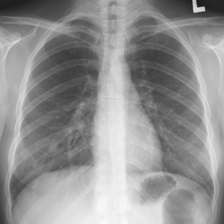

In [ ]:
pneumonia

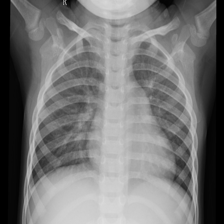

In [ ]:
normal

In [ ]:
import numpy as np
normal = np.array(normal).reshape(1, 224, 224, 1) / 255.0
pneumonia = np.array(pneumonia).reshape(1, 224, 224, 1) / 255.0

可視化卷積神經網絡 (CNN) 模型的第一個卷積層的濾波器（filter）的輸出。

解釋：

- test = Sequential(model.layers[0])：建立一個新的 Sequential 模型，其中只包含原始模型的第一個卷積層。這是通過取原始模型的第一層來實現的，即 model.layers[0]。

- test_pre = test.predict(normal)[0]：使用這個新的模型 test 對正常的 X-ray 圖像進行預測，並獲得第一個卷積層的輸出。

- 接下來的迴圈遍歷 test_pre 的每個通道（filter），並顯示每個通道的特徵圖。

- filter1 = test_pre[:, :, i]：選取第 i 個通道的特徵圖。

- ma = filter1.max(axis=(0, 1)) 和 mi = filter1.min(axis=(0, 1))：計算每個特徵圖的最大值和最小值，用於歸一化。

- filter1 = (filter1 - mi) / (ma - mi)：對特徵圖進行歸一化，將像素值縮放到 0 到 1 之間。

- plt.subplot(8, 8, i+1)：設置當前子圖的位置。

- plt.axis("off")：隱藏坐標軸。

- plt.imshow(filter1, cmap="OrRd")：顯示特徵圖，使用 "OrRd" 色彩映射。

能夠觀察到第一個卷積層的每個濾波器（filter）對輸入圖像的不同特徵的響應。每個子圖代表一個濾波器的特徵圖。

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


<ipython-input-60-7d552f7459c5>:11: RuntimeWarning: invalid value encountered in divide
  filter1 = (filter1 - mi) / (ma - mi)


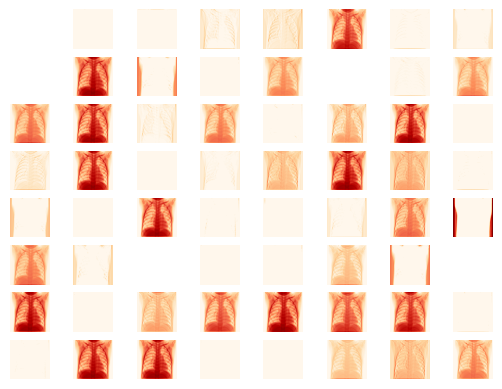

In [ ]:
# 建立一個新的 Sequential 模型
test = Sequential()

# 將原始模型的第一層 (Conv2D) 加入新的模型
test.add(model.layers[0])
test_pre = test.predict(normal)[0]
for i in range(test_pre.shape[-1]):
    filter1 = test_pre[:, :, i]
    ma = filter1.max(axis=(0, 1))
    mi = filter1.min(axis=(0, 1))
    filter1 = (filter1 - mi) / (ma - mi)
    plt.subplot(8, 8, i+1)
    plt.axis("off")
    plt.imshow(filter1, cmap="OrRd")

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.6389 - loss: 0.6867 - val_accuracy: 0.8250 - val_loss: 0.6543
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 437ms/step - accuracy: 0.6505 - loss: 0.6790 - val_accuracy: 0.9250 - val_loss: 0.6292
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.7356 - loss: 0.6600 - val_accuracy: 0.8750 - val_loss: 0.5674
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 430ms/step - accuracy: 0.6282 - loss: 0.6703 - val_accuracy: 0.9500 - val_loss: 0.5233
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - accuracy: 0.6466 - loss: 0.6355 - val_accuracy: 0.9500 - val_loss: 0.4420


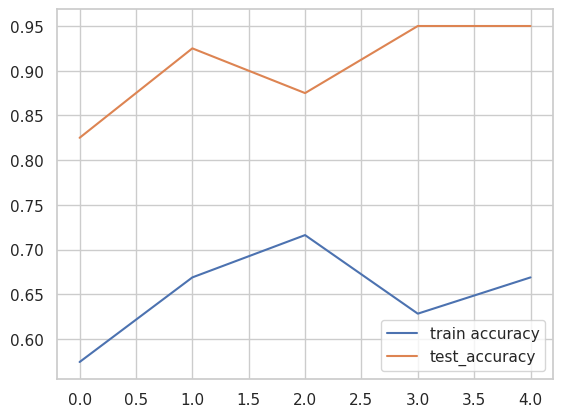

In [ ]:
history = model.fit(training_set,
                    epochs=5,
                    validation_data=test_set,
                    callbacks=callbacks,)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.show()

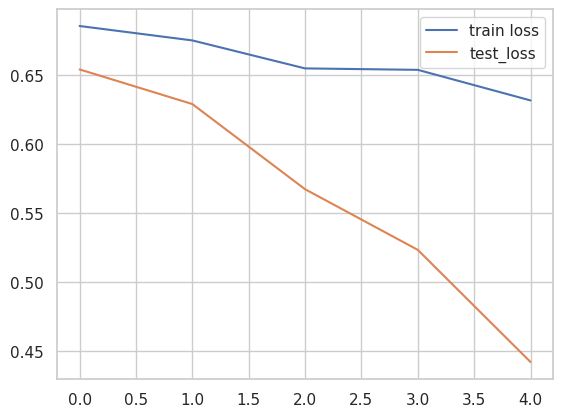

In [ ]:
plt.plot(history.history['loss'], label = 'train loss') # Access loss from the history object
plt.plot(history.history['val_loss'],label = 'test_loss') # Access val_loss from the history object
plt.legend()
plt.show()

In [ ]:
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Now save the model
model.save('models/model.keras')

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6562 - loss: 0.6183 - val_accuracy: 0.9500 - val_loss: 0.4059
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.6899 - loss: 0.6146 - val_accuracy: 1.0000 - val_loss: 0.4133
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 423ms/step - accuracy: 0.6550 - loss: 0.6338 - val_accuracy: 1.0000 - val_loss: 0.3827
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.6632 - loss: 0.5844 - val_accuracy: 1.0000 - val_loss: 0.3567
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.6224 - loss: 0.6434 - val_accuracy: 1.0000 - val_loss: 0.3710


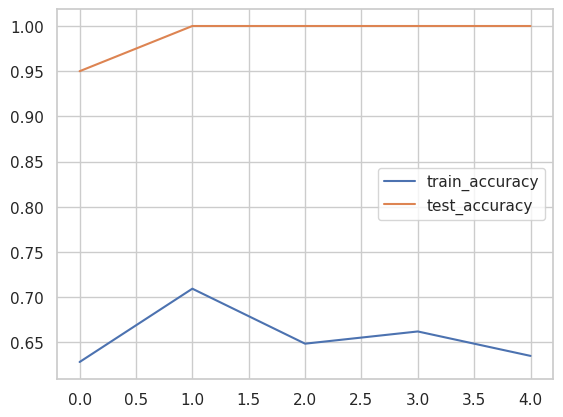

In [ ]:
# Replace the line with error with the following lines:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy']) # Add accuracy metric here

# Fit the model again after the re-compilation
history = model.fit(training_set,
                    epochs=5,
                    validation_data=test_set,
                    callbacks=callbacks,)

# Original line:
# model.compile(loss=SparseCategoricalCrossentropy(),
#        optimizer=Adam(),
#        metrics=["accuracy"])
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

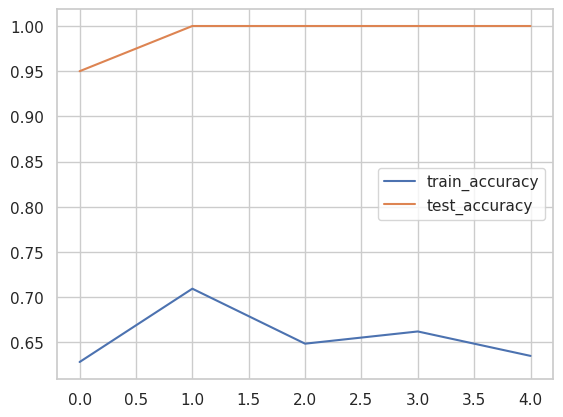

In [ ]:
import matplotlib.pyplot as plt
# Replace the line with error with the following lines:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy']) # Add accuracy metric here

# Original line:
# model.compile(loss=SparseCategoricalCrossentropy(),
#        optimizer=Adam(),
#        metrics=["accuracy"])
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label = 'train_accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()